# **XOR problem**

## 1.환경준비
* 라이브러리 로딩 및 데이터 생성

### (1) 라이브러리 로딩

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

### (2) 데이터 생성

#### 1) X data

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

#### 2) AND data

In [ ]:
y_and = np.array([0, 0, 0, 1])
y_and

array([0, 0, 0, 1])

#### 3) OR data

In [ ]:
y_or = np.array([0, 1, 1, 1])
y_or

array([0, 1, 1, 1])

#### 4) XOR data

In [ ]:
y_xor = np.array([0, 1, 1, 0])
y_xor

array([0, 1, 1, 0])

### (3) 데이터 확인(시각화)

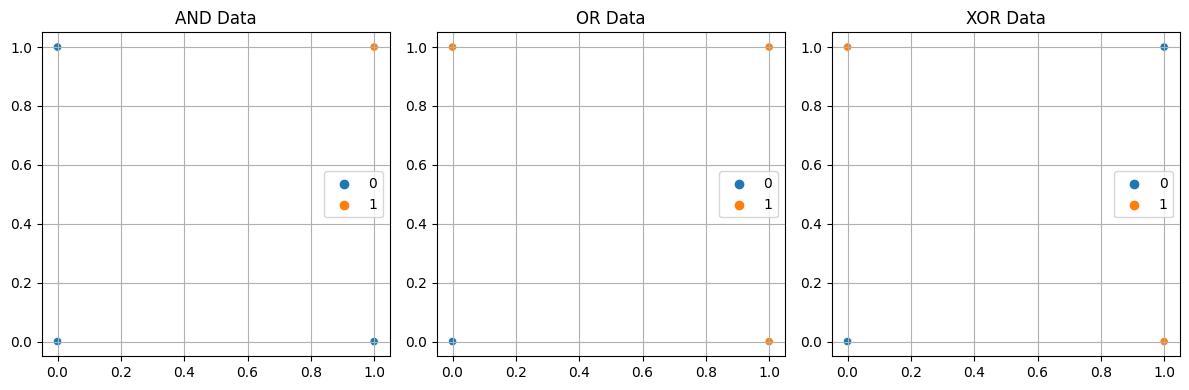

In [ ]:
# 1행 3열 프레임으로 그래프 그리기
plt.figure(figsize = (12, 4))
plt.subplot(1,3,1)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_and)
plt.title('AND Data')
plt.grid()

plt.subplot(1,3,2)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_or)
plt.title('OR Data')
plt.grid()

plt.subplot(1,3,3)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_xor)
plt.title('XOR Data')
plt.grid()

plt.tight_layout()
plt.show()

## 2.AND data 모델링

### (1) 모델링

In [ ]:
# 모델 구조 : 단층 레이어
model1 = keras.Sequential(keras.layers.Dense(1, input_shape = (2, ), activation='sigmoid'))

# 컴파일 및 학습
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X, y_and, epochs=10000, verbose=0)

### (2) 모델 경계 시각화

313/313 [==============================] - 1s 2ms/step


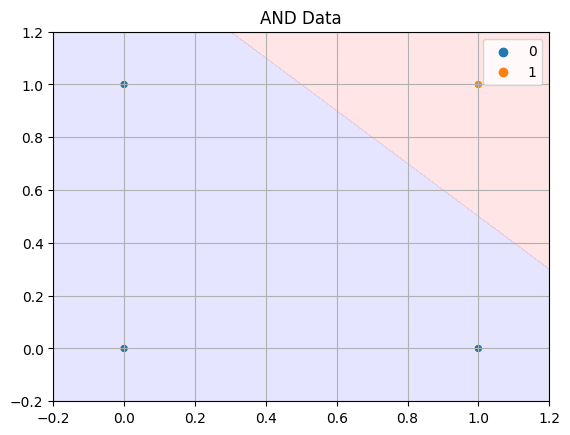

In [ ]:
# 결정 경계 시각화
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z_and = model1.predict(X_grid).reshape(xx.shape)

plt.contourf(xx, yy, Z_and, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.1)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_and)
plt.title("AND Data")
plt.grid()
plt.show()

## 3.OR data 모델링

### (1) 모델링

In [ ]:
# 모델 구조 : 단층 레이어
model2 = keras.Sequential(keras.layers.Dense(1, input_shape = (2, ), activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X, y_or, epochs=10000, verbose=0)

### (2) 모델 경계 시각화

313/313 [==============================] - 1s 1ms/step


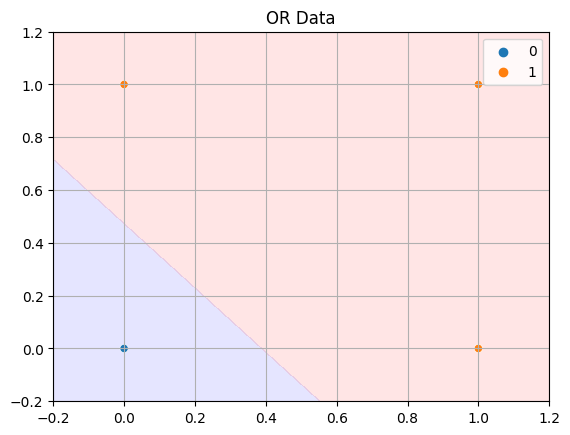

In [ ]:
# 결정 경계 시각화
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z_or = model2.predict(X_grid).reshape(xx.shape)

plt.contourf(xx, yy, Z_or, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.1)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_or)
plt.title("OR Data")
plt.grid()
plt.show()

## 3.XOR data 모델링

### (1) 기존 모델 구조(선형모델)

#### 1) 모델링

In [ ]:
# 모델 구조 : 단층 레이어
model3_1 = keras.Sequential(keras.layers.Dense(1, input_shape = (2, ), activation='sigmoid'))

model3_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3_1.fit(X, y_xor, epochs=10000, verbose=0)

#### 2) 모델 경계 시각화

313/313 [==============================] - 1s 2ms/step


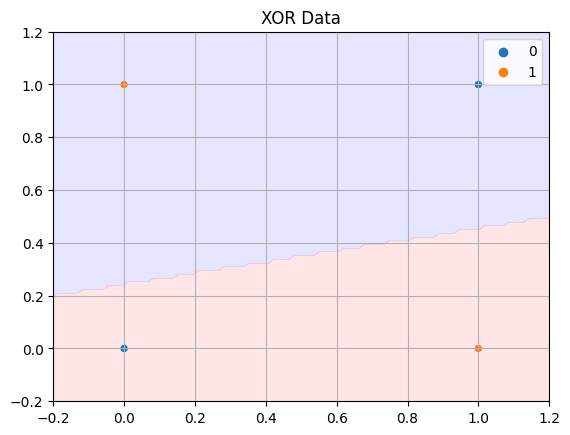

In [ ]:
# 결정 경계 시각화
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z_xor1 = model3_1.predict(X_grid).reshape(xx.shape)

plt.contourf(xx, yy, Z_xor1, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.1)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_xor, markers = 'x')
plt.title("XOR Data")
plt.grid()
plt.show()

### (2) 비선형 모델
* hidden layer 추가
* 비선형 activation function

#### 1) 모델링

In [ ]:
# 모델 구조 : 다층 레이어(hidden layer 1개 추가)
model3_2 = keras.Sequential([keras.layers.Dense(2, input_shape = (2, ), activation='relu'),
                             keras.layers.Dense(1, activation='sigmoid')])

# 컴파일 및 학습
model3_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3_2.fit(X, y_xor, epochs=10000, verbose=0)

#### 2) 모델 경계 시각화

313/313 [==============================] - 0s 1ms/step


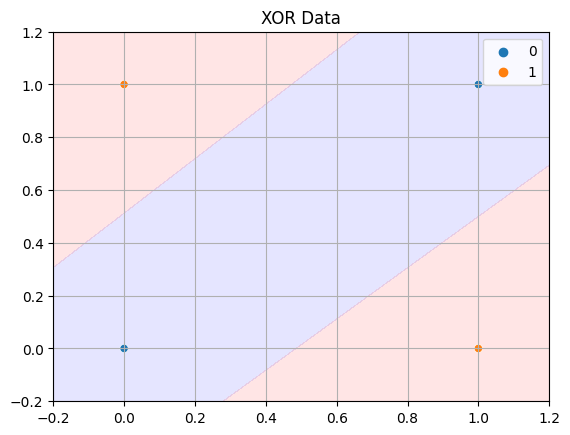

In [ ]:
# 결정 경계 시각화
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z_xor2 = model3_2.predict(X_grid).reshape(xx.shape)

plt.contourf(xx, yy, Z_xor2, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.1)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_xor)
plt.title("XOR Data")
plt.grid()
plt.show()